# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'currencyrdy.csv'))

In [5]:
df.columns

Index(['Country', 'Product/Category', 'Month', 'Year', 'PriceUSD'], dtype='object')

In [6]:
df.head(5)

,Country,Product/Category,Month,Year,PriceUSD
0,Afghanistan,Bread - Retail,Jan,2000,0.1777
1,Afghanistan,Bread - Retail,Jan,2001,0.2078
2,Afghanistan,Bread - Retail,Jan,2002,0.1060
3,Afghanistan,Bread - Retail,Jan,2003,0.1515
4,Afghanistan,Bread - Retail,Jan,2004,0.1751


In [7]:
df.shape

(107076, 5)

In [8]:
df.isnull().sum()

Country                0
Product/Category       0
Month                  0
Year                   0
PriceUSD            5316
dtype: int64

In [9]:
df['PriceUSD'].fillna(df['PriceUSD'].median(),inplace=True)

In [10]:
df.isnull().sum()

Country             0
Product/Category    0
Month               0
Year                0
PriceUSD            0
dtype: int64

In [11]:
df.shape

(107076, 5)

In [12]:
df["PriceUSD"].max()

2113.5317

In [13]:
df.describe()

,Year,PriceUSD
count,107076.000000,107076.000000
mean,2014.575432,7.065974
std,4.773755,33.536695
min,1992.000000,0.000000
25%,2011.000000,0.458175
50%,2015.000000,0.891700
75%,2019.000000,2.534950
max,2021.000000,2113.531700


In [14]:
dups = df.duplicated()

In [15]:
# no dups

dups.shape

(107076,)

In [16]:
df['Product/Category'].value_counts()

Wheat flour - Retail                  3272
Sugar - Retail                        2418
Rice - Retail                         1933
Potatoes - Retail                     1805
Maize - Retail                        1731
                                      ... 
Beans (haricot, white) - Wholesale       1
Beans (haricot, red) - Wholesale         1
Transport (public, bus) - Retail         1
Transport (public, moto) - Retail        1
Kocho - Retail                           1
Name: Product/Category, Length: 608, dtype: int64

In [17]:
df2 = df[df['Product/Category'].isin(['Wheat flour - Retail','Sugar - Retail','Rice - Retail'])]

In [18]:
df2.isnull().sum()

Country             0
Product/Category    0
Month               0
Year                0
PriceUSD            0
dtype: int64

In [19]:
df2.shape

(7623, 5)

In [20]:
df2.head(10)

,Country,Product/Category,Month,Year,PriceUSD
718,Afghanistan,Sugar - Retail,Jan,2021,0.5885
719,Afghanistan,Sugar - Retail,Feb,2021,0.5871
720,Afghanistan,Sugar - Retail,Mar,2021,0.5834
721,Afghanistan,Sugar - Retail,Apr,2021,0.5852
722,Afghanistan,Sugar - Retail,May,2020,0.5691
723,Afghanistan,Sugar - Retail,May,2021,0.5899
724,Afghanistan,Sugar - Retail,Jun,2020,0.5852
725,Afghanistan,Sugar - Retail,Jun,2021,0.5890
726,Afghanistan,Sugar - Retail,Jul,2020,0.5900
727,Afghanistan,Sugar - Retail,Jul,2021,0.6060


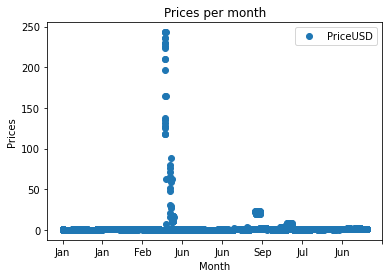

In [21]:
df2.plot (x="Month", y="PriceUSD", style="o")
plt.title("Prices per month")
plt.xlabel("Month")
plt.ylabel("Prices")
plt.show()

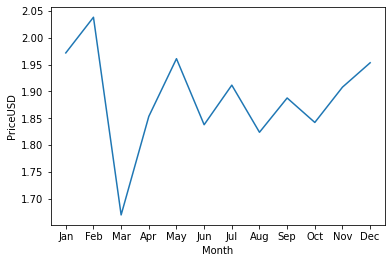

In [22]:
sns.lineplot(x=df2['Month'],y=df2['PriceUSD'], ci=None)
plt.savefig('sugfloric.png',dpi=200)
plt.show()

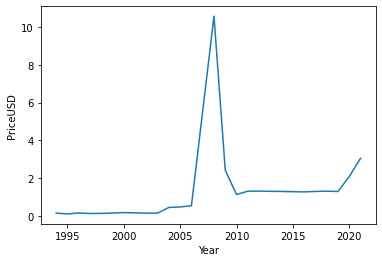

In [23]:
sns.lineplot(x=df2['Year'],y=df2['PriceUSD'], ci=None)
plt.show()

# Hypothesis = Prices change seasonally

In [24]:
d={
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12
}


In [25]:
df2.Month = df2.Month.map(d)

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['Month'].values.reshape(-1,1)
y = df2['PriceUSD'].values.reshape(-1,1)

In [27]:
X

array([[ 1],
       [ 2],
       [ 3],
       ...,
       [10],
       [11],
       [12]], dtype=int64)

In [28]:
y

array([[0.5885],
       [0.5871],
       [0.5834],
       ...,
       [0.7934],
       [0.7817],
       [0.7834]])

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
# create a regression object

regression = LinearRegression()

In [31]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

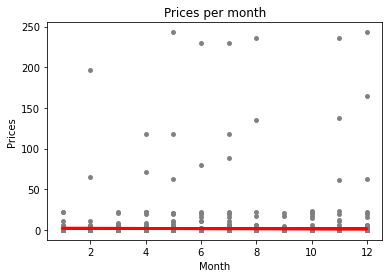

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s = 15)
plot_test.plot(X_test, y_predicted, color = "red", linewidth = 3)
plot_test.title("Prices per month")
plot_test.xlabel("Month")
plot_test.ylabel("Prices")
plt.savefig('regression.png')
plot_test.show()

## the line doesn't fit the data

In [34]:
# create objects with model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05589564]]
Mean squared error:  228.1664393854706
R2 score:  -0.0029665941993326506


In [36]:
y_predicted

array([[1.70551788],
       [1.37014402],
       [1.59372659],
       ...,
       [1.87320482],
       [1.59372659],
       [1.64962224]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.1750,1.705518
1,0.7365,1.370144
2,2.4814,1.593727
3,0.7078,1.873205
4,0.6933,1.537831
5,0.5112,1.426040
6,0.4797,1.929100
7,0.4274,1.481935
8,0.8562,1.984996
9,0.1823,1.705518
